# Introduction
In this report, we analyze a dataset consisting of 6691 images from the Mars Science Laboratory (MSL) rover, covering 25 classes. Our focus is on the classification and interpretation of these images. In this assignment we will build an end-to-end multi class classifer using TensorFlow2.0 and TensorFlow Hub.

# Problem
The primary challenge addressed in this project is the accurate identification of images from the dataset into one of the 25 predefined classifications.

# Dataset
The dataset for this project can be accessed [here](https://drive.google.com/drive/folders/1LMgNFK_81WGgZtT_A-fZgKDZa_SVjdNA?usp=drive_link)

# Evaluation

The evaluation is a file with prediction probabilities for each class of each test image.

# Features

Some info about the data
* We are dealing with images (unstructured data) so it is best to use deep learning/ transfer learning.
* The images are segregated into 25 different classes
* There are around 3000+ images in the training set with labels for the respective images

# Setting Up the Environment


In [1]:
import tensorflow as tf
import tensorflow_hub as hub


print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# GPU Availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.14.0
TF Hub version:  0.15.0
GPU available


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Mars_Rover')
cwd =  os.getcwd()
cwd

'/content/drive/MyDrive/Colab Notebooks/Mars_Rover'

# Data Import and Preprocessing

We'll import the training, validation, and test datasets from the given text files, parsing each image path and label, and storing them in separate lists for further processing.

## Import Train Data

In [ ]:
# Import Train Data
train_images = []
train_labels = []

with open('train-calibrated-shuffled.txt') as file:
  for line in file:
    path, label = line.strip().split(' ')
    #Append to list
    train_images.append(cwd + '/' + path)
    train_labels.append(int(label))

print(train_images)
print(train_labels)
print(len(train_images))

# Converting to panda series
X_train = pd.Series(train_images, name='Train_JPG_Images').astype(str)
Y_train = pd.Series(train_labels, name = 'Train_Label')

X_train
Y_train

['/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0077ML0005780000102730I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0072MR0005610170103642E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0069MR0004130000103477I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0154ML0008510010104492E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0019MR0000530000100138C00_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0017ML0000500200100233B00_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0025MR0001230130100711E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0044MR0002011110102490E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0003ML0000000160100036I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0159MR0008640180201373E01_DRCL.JPG', '/content

0       15
1        8
2       21
3        8
4        8
        ..
3741    10
3742     8
3743    21
3744     8
3745     8
Name: Train_Label, Length: 3746, dtype: int64

In [ ]:
len(X_train)

3746

## Import Validation Data

In [ ]:
# Import Validation Data
val_images = []
val_labels = []

with open('val-calibrated-shuffled.txt') as file:
  for line in file:
    path, label = line.strip().split(' ')
    #Append to list
    val_images.append(cwd + '/' + path)
    val_labels.append(int(label))

print(val_images)
print(val_labels)
print(len(val_images))

X_val = pd.Series(val_images, name = 'Val_JPG_Images').astype('str')
Y_val = pd.Series(val_labels, name = 'Val_Label')

Y_val

['/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0292MH0002810020103587C00_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0270MH0002530050102760I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0549MH0002620000201566E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0229MR0009720000202913E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0292MH0002810020103613C00_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0552MH0002620000201620I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0195ML0009590000105958I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0562MH0002620000201773I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0546MH0002600000201505I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0561MH0003250050201761E01_DRCL.JPG', '/content

0        5
1        5
2       24
3        0
4        5
        ..
1635     0
1636     8
1637    16
1638    18
1639     5
Name: Val_Label, Length: 1640, dtype: int64

In [ ]:
len(X_val)

1640

## Import Test Data

In [ ]:
# Import Test Data
test_images = []
test_labels = []

with open('test-calibrated-shuffled.txt') as file:
  for line in file:
    path, label = line.strip().split(' ')
    test_images.append(cwd + '/' + path)
    test_labels.append(int(label))

print(test_images)
print(test_labels)
print(len(test_images))

X_test = pd.Series(test_images, name = 'Test_JPG_Images').astype('str')
Y_test = pd.Series(test_labels, name = 'Test_label')

X_test

['/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0830MR0036510000500684E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0640MH0002640000203781I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0647MH0003250050203806E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0844MR0037590000501001I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0618MR0026460020401253I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0605MH0003060010203269I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0584MH0003620020202285I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0585MH0002970020202775I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0882MH0003900000302471I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0585MH0002970020202906I01_DRCL.JPG', '/content

0       /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
1       /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
2       /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
3       /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
4       /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
                              ...                        
1300    /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
1301    /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
1302    /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
1303    /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
1304    /content/drive/MyDrive/Colab Notebooks/Mars_Ro...
Name: Test_JPG_Images, Length: 1305, dtype: object

# Data Exploration and Visualization

## Data Dictionary

The `data_dictionary` function reads and prints each line from a text file named 'msl_synset_words-indexed.txt' for our quick reference. It can be invoked anytime to understand the type of classification we are dealing with.

In [ ]:
def data_dictionary():
    with open('msl_synset_words-indexed.txt') as file:
        for line in file:
            print(line)

In [ ]:
data_dictionary()

0       apxs

1       apxs cal target

2       chemcam cal target

3       chemin inlet open

4       drill

5       drill holes

6       drt front

7       drt side

8       ground

9       horizon

10      inlet

11      mahli

12      mahli cal target

13      mastcam

14      mastcam cal target

15      observation tray

16      portion box

17      portion tube

18      portion tube opening

19      rems uv sensor

20      rover rear deck

21      scoop

22      sun

23      turret

24      wheel



## Exploring Unique Labels in Datasets

The unique labels within the datasets are identified, providing insight into the variety of classes present.

In [ ]:
uni_test = set(Y_test)
print(uni_test)

{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24}


In [ ]:
len(X_test)

1305

## Training Set Analysis

* Completed Initialization
* Next step is to understand the data, the distribution of classes and the number of unique values in the training data.

In [ ]:
Y_train.nunique()

24

In [ ]:
uni_train =  np.sort(Y_train.unique())
print(uni_train)
print(Y_train.value_counts())

uni_val =  np.sort(Y_val.unique())
print(uni_val)
print(Y_val.value_counts())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24]
8     2343
9      224
23     178
21     166
10     165
14     101
15      85
17      73
24      69
20      57
3       47
13      36
5       36
12      32
0       30
4       19
16      18
2       15
11      14
19      12
7        8
18       8
1        6
6        4
Name: Train_Label, dtype: int64
[ 0  1  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 21 23 24]
24    629
5     470
10     96
8      87
9      75
17     55
3      45
12     28
21     24
4      20
19     20
16     20
0      16
23     15
15     14
18     12
14      4
7       4
1       4
6       2
Name: Val_Label, dtype: int64


## Observations from the "Labels" column:
Label 22 does not exist in Train or Validation Dataset.
Thus the number of unique classes are 24.

Also, the number of datasets for the categories:

4, 16, 2, 11, 19, 7, 18, 1 & 6 are less than 20 and thus will require some additional inputs for improved training.

## Visualizing Images from Datasets

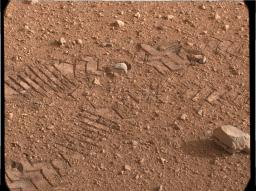

In [ ]:
from IPython.display import Image
Image(X_train[5])

# Data Preprocessing for Model Input
Approach
* Take an image file path as input
* Use TensorFlow to read the image and save it as 'image'
* Turn our 'image' into Tensors
* Normalize our images
* Resize the 'image' to be a shape of (224, 224)
* Return the modified image

Before that, we will experiment with the steps to be used in our function

In [ ]:
# convert image to NumPy Array
from matplotlib.pyplot import imread
image = imread(X_train[5])
image.shape

(191, 256, 3)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(191, 256, 3), dtype=uint8, numpy=
array([[[41, 44, 49],
        [ 0,  0,  5],
        [ 0,  0,  4],
        ...,
        [43, 39, 38],
        [45, 35, 33],
        [91, 78, 72]],

       [[40, 43, 48],
        [ 0,  0,  5],
        [ 0,  1,  5],
        ...,
        [ 1,  0,  0],
        [ 7,  0,  0],
        [50, 37, 31]],

       [[38, 41, 46],
        [ 0,  0,  5],
        [ 1,  2,  6],
        ...,
        [ 1,  0,  0],
        [ 7,  0,  0],
        [49, 38, 34]],

       ...,

       [[ 2,  3,  7],
        [ 2,  3,  5],
        [ 0,  0,  2],
        ...,
        [ 0,  3,  4],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[ 0,  1,  4],
        [ 0,  3,  6],
        [ 0,  2,  3],
        ...,
        [ 0,  3,  4],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       [[ 0,  2,  5],
        [ 0,  2,  5],
        [ 0,  5,  5],
        ...,
        [ 0,  1,  2],
        [ 0,  2,  1],
        [ 1,  3,  0]]], dtype=uint8)>

## Defining Image Size and Preprocessing Function

Here we set a standard size for every image and create a method to get them ready. This method takes each image, turns it into a format(tensor) the computer can understand, adjusts the colours so they're consistent, and makes sure each image is the same size (224x224 pixels). Doing this makes all the images uniform, which is really important for analyzing them correctly and feeding them into our machine learning model.



In [ ]:
# Defining image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  #Read in an image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3 colour channel
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to (224,224)
  image = tf.image.resize(image, size = [img_size, img_size])

  return image

## Preprocessing and Checking Images

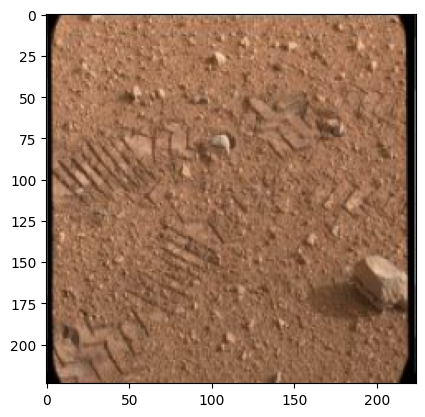

In [ ]:
# Processing a single image to check the range
processed_image = process_image(X_train[5])
plt.imshow(processed_image)

# Preparing Data for Model Training

## Encoding Labels

We'll get our labels ready for the training.
* First, we combine all the labels from both the training and validation sets.
* We then use 'LabelEncoder' to change these labels from words or categories into numbers that our model can understand more easily.
* We split these number-coded labels back into separate training and validation sets.
* Finally, we check to make sure these transformed labels have all the unique values we expect, confirming everything's coded correctly before we start training our model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Combine the training and validation labels
all_labels = np.concatenate([Y_train, Y_val])

# Fit the encoder on all labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Split them back into training and validation sets
Y_train_encoded = all_labels_encoded[:len(Y_train)]
Y_val_encoded = all_labels_encoded[len(Y_train):]

# Check the unique values in the transformed labels
print("Unique values in Y_train_encoded:", np.unique(Y_train_encoded))
print("Unique values in Y_val_encoded:", np.unique(Y_val_encoded))


Unique values in Y_train_encoded: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in Y_val_encoded: [ 0  1  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 21 22 23]


In [ ]:
import pickle

# Save the encoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


## Turning our data into Batches

We will process only 32 images (1 batch size) at a time so that it is efficient wrt the memory consumed.

In order to use TensorFlow effectively, we need our data in the forma of Tensor tuples which looks like this: (image, label).
Ideally, in pairs!

In [ ]:
# Create a function to return a tuples (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image =  process_image(image_path)
  return image, label

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_data = train_data.map(get_image_label)

We have now got our data into tuples of tensors.Next step is to make a function to turn all our data (X,y) in bacthes.

In [ ]:
# Define Batch Size
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of images and label pairs.
  Schuffles the data if it is a training data but doesn't shuffle if its a validation data.
  Also accepts test data as input (no labels)
  """

  # Check that the input data is the correct type
  if not isinstance(X, (list, np.ndarray)):
      raise ValueError("X should be a list or a numpy array")
  if y is not None and not isinstance(y, (list, np.ndarray)):
      raise ValueError("y should be a list or a numpy array")




  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only file paths, no labels
    data_batch =  data.map(process_image).batch(batch_size)
    return data_batch

  # If the data is valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch =  data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples and turning data into batches
    data_batch = data.map(get_image_label).batch(batch_size)
    print("Creating training data batches...")

  return data_batch

In [ ]:
print(type(X_train))
print(type(X_val))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
X_train = X_train.tolist()
X_val = X_val.tolist()

In [ ]:
print(type(X_train))
print(type(X_val))

<class 'list'>
<class 'list'>


## Create training and validation data batches

In [ ]:
BATCH_SIZE = 32
train_data = create_data_batches(X_train, Y_train_encoded, batch_size=BATCH_SIZE)
val_data = create_data_batches(X_val, Y_val_encoded, valid_data=True, batch_size=BATCH_SIZE)


Creating training data batches...
Creating validation data batches...


In [ ]:
# Checking attributes of our dataset
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)))

## Visualizing Data Batches

Our data is in batches and these are a litle hard to understand, so let us try and visualize it.


In [ ]:
import matplotlib.pyplot as plt

#Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  plt.figure(figsize = (10, 10))
  # Loop through 25 images
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")

In [ ]:
len(train_images), len(train_labels)

(3746, 3746)

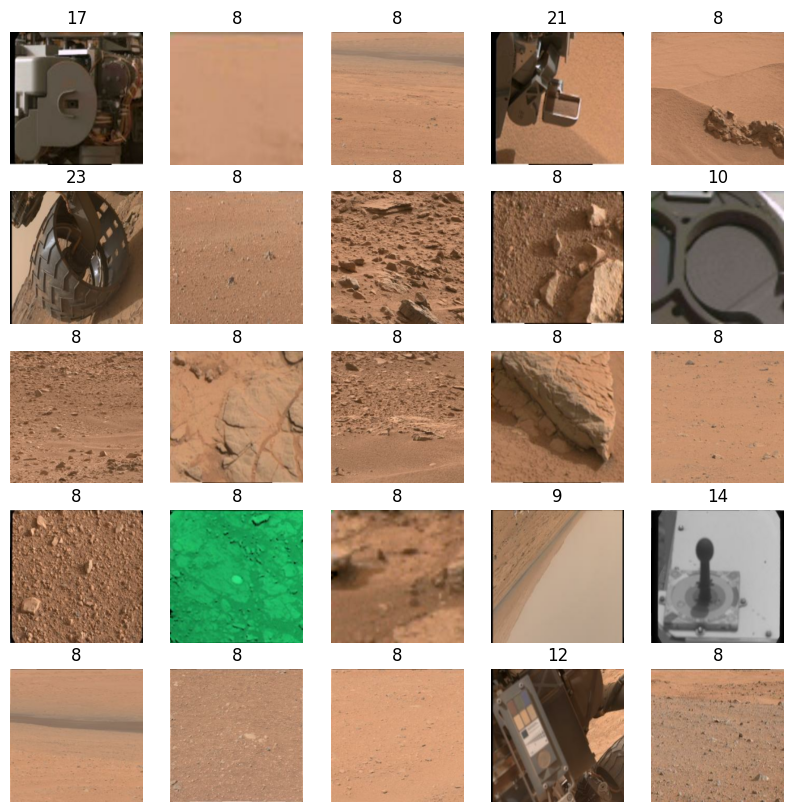

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

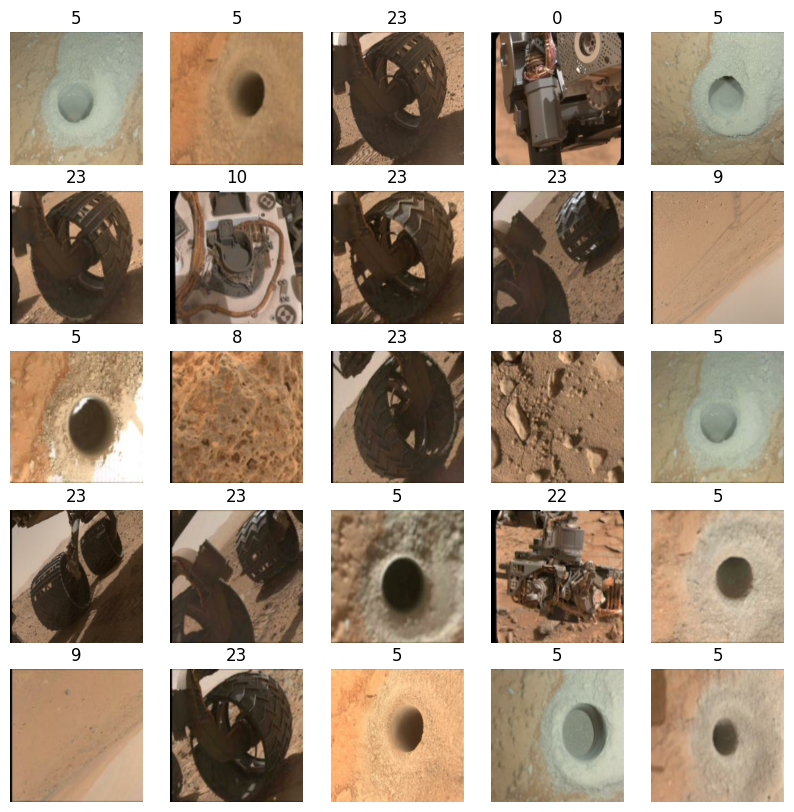

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

Before we build a model, there are a few things we need to define
* The input shape
* The output shape
* The URL of the model we want to use


## Setting Up the Model Architecture

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  #batch,height, width, channels
OUTPUT_SHAPE = 24
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
tf.constant(train_images[0]).shape

TensorShape([224, 224, 3])

In [ ]:
tf.constant(train_labels[0]).shape

TensorShape([])

We will create a blueprint for our machine learning model.
* We begin by defining the model's input and output parameters and the no. of categories of classification.
* We then make use of pre-trained layer from TensorFlow Hub.
* Additionally, a dense layer is added for making final classifications.

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE) # Leting the model know what kind of inputs it'll be getting

  return model

## Model Summary

In [ ]:
model = create_model(output_shape=OUTPUT_SHAPE) #
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 24)                24048     
                                                                 
Total params: 5456761 (20.82 MB)
Trainable params: 24048 (93.94 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


# Model Training
We will create 2 callbacks, one for TensorBoard which helps track our models progress and another for ealy stopping which prevents our model from training too long

## Setting Up TensorBoard and Early Stopping

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
from time import strftime
import datetime

#Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  #Create a log directory for storing TensorBoard logs
  logdir = os.path.join("%s/logs"%cwd,
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

Prevents overfitting

In [ ]:
# Create early stopping callnbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

## Training the model

Our first model will be trained on 100 images

In [ ]:
NUM_EPOCHS = 100

### Function to train a model

* Create a model using create_model()
* Setup a TensorBoard callback using 'create_tensorboard_callback()'
* Call the filt() function
* Return the model

In [ ]:
# Build a function to treain and return the trained  model

def train_model():
  # Creates a model
  model = create_model()

  # Create a tensorboard session
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data by passing it the callbacks
  model.fit(x = train_data, epochs = NUM_EPOCHS,
           validation_data = val_data,
           validation_freq = 1,
           callbacks = [tensorboard, early_stopping])

  #Return the fit model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

# Model Evaluation and Visualization

## Saving the Model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("%s/model"%cwd,
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".keras" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(model, suffix="all-images-Adam_norm_0-1")

## Loading the Trained Model

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
model.evaluate(val_data)

For learning-rate 0.01

In [ ]:
model = load_model('model/20231126-22141701036887-all-images-Adam_norm_0-1.keras')

For learning-rate 0.001

In [ ]:
model = load_model('model/20231125-12541700916888-all-images-Adam_norm_0-1.keras')

For learning-rate 0.0001

In [ ]:
model = load_model('model/20231126-17241701019488-all-images-Adam_norm_0-1.keras')

Loading saved model from: model/20231126-17241701019488-all-images-Adam_norm_0-1.keras


## Evaluating the Model on Validation Data

In [ ]:
model.evaluate(val_data)

52/52 [==============================] - 4s 65ms/step - loss: 1.1459 - accuracy: 0.6896


[1.1459304094314575, 0.6896341443061829]

## Make predictions on Validation Data

In [ ]:
predictions = model.predict(val_data, verbose =1)
predictions

52/52 [==============================] - 5s 73ms/step


array([[3.1465402e-06, 5.1917695e-04, 1.0274299e-05, ..., 2.4508608e-05,
        6.3817388e-06, 4.4932174e-05],
       [2.9893176e-04, 9.1498466e-03, 2.6802049e-04, ..., 2.1884785e-05,
        8.3439669e-04, 6.4901814e-02],
       [4.0569089e-06, 1.4210882e-07, 3.3080067e-07, ..., 1.0249795e-04,
        4.6804653e-05, 9.9944443e-01],
       ...,
       [1.2623729e-03, 2.9517341e-04, 9.5848842e-03, ..., 3.7821943e-03,
        3.6422713e-03, 4.7558272e-04],
       [6.9545541e-04, 2.1092068e-05, 3.6465083e-04, ..., 4.8236181e-03,
        1.7113234e-04, 6.4416900e-02],
       [2.9531773e-06, 7.6888141e-04, 2.0953798e-05, ..., 1.4165115e-05,
        2.7727033e-04, 8.2906609e-04]], dtype=float32)

In [ ]:
predictions.shape

(1640, 24)

In [ ]:
predictions[0]   # describes the probability of an image wrt to 24 classes that we have

array([3.1465402e-06, 5.1917695e-04, 1.0274299e-05, 9.9436902e-06,
       4.1421028e-03, 3.8362628e-01, 6.3755488e-07, 1.5334647e-06,
       6.0530245e-01, 2.5183847e-03, 5.1014853e-04, 3.1414638e-06,
       5.3427939e-05, 3.9622887e-06, 1.1542613e-03, 3.3737961e-04,
       1.0838071e-06, 6.4777932e-04, 4.5538709e-05, 3.8443795e-06,
       1.0296939e-03, 2.4508608e-05, 6.3817388e-06, 4.4932174e-05],
      dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0

## Assessing Confidence

In this part, we're interpreting what our model thinks about the validation images.
* First, we bring back the label encoder we used earlier to turn our labels into numbers.
* Then, for each image, we use this tool to change our model's number predictions back into understandable labels.
* We also measure how sure the model is about each prediction, which we call 'confidence'.

This helps us see not only what the model thinks each image is but also how certain it is about its guess. At the end, we check the predicted label and confidence for the first image to make sure everything's working as expected.

In [ ]:
# Load the encoder back
with open('label_encoder.pkl', 'rb') as file:
  loaded_label_encoder = pickle.load(file)

predicted_labels = []
predicted_confidence = []
# Use loaded_label_encoder to transform labels back
for index in range(len(Y_val)):
  label = loaded_label_encoder.inverse_transform([np.argmax(predictions[index])])
  predicted_labels.append(label[0])

  confidence = np.max(predictions[index])
  predicted_confidence.append(confidence)

print(predicted_labels[0])
print(predicted_confidence[0])


8
0.60530245


In [ ]:
def get_pred_label(prediction_probabilities):
  return prediction_probabilities

In [ ]:
get_pred_label(predicted_labels[0])

8

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

Unbatch the Validation Dataset so as to make a comparison with the predicted labels

In [ ]:
true_images = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  true_images.append(image)
  labels_.append(label)


In [ ]:
true_labels = []
# Use loaded_label_encoder to transform labels back
for index in range(len(Y_val)):
  label = loaded_label_encoder.inverse_transform([labels_[index]])
  true_labels.append(label[0])

print(true_labels[0])

5


In [ ]:
true_labels[2]

24

In [ ]:
get_pred_label(true_labels[0])

5

We have finally got ways to get the following:
* Predicted Labels
* Validation Labels (Truth)
* Validation Images

## Visualizing Predictions

In [ ]:
def plot_pred(predicted_labels, predicted_confidence, true_labels, true_images, n=1):
  pred_label, pred_prob, true_label, image = predicted_labels[n], predicted_confidence[n], true_labels[n], true_images[n]

  #Plot images
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change Colour based on Prediction
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.title("{}   {:.2f}%   {}".format(pred_label, pred_prob*100, true_label), color =  color)
  pass


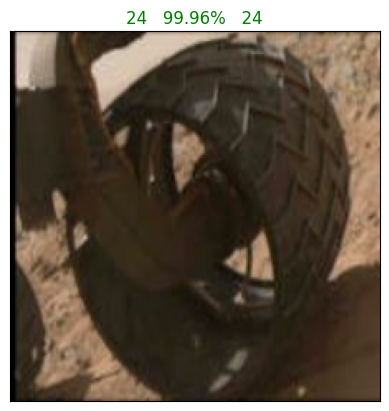

In [ ]:
plot_pred(predicted_labels, predicted_confidence, true_labels, true_images, n=21)

In [ ]:
data_dictionary()

0       apxs

1       apxs cal target

2       chemcam cal target

3       chemin inlet open

4       drill

5       drill holes

6       drt front

7       drt side

8       ground

9       horizon

10      inlet

11      mahli

12      mahli cal target

13      mastcam

14      mastcam cal target

15      observation tray

16      portion box

17      portion tube

18      portion tube opening

19      rems uv sensor

20      rover rear deck

21      scoop

22      sun

23      turret

24      wheel



We see that our model has correctly predicted that the image is of a wheel with 99.96% confidence rate.

In [ ]:
accuracy = sum(pred == true for pred, true in zip(predicted_labels, true_labels)) / len(true_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


In [ ]:
pred_unique = set(predicted_labels)
pred_unique

{0, 1, 3, 4, 5, 8, 9, 10, 12, 15, 16, 17, 18, 19, 20, 21, 23, 24}

In [ ]:
true_unique = set(true_labels)
true_unique

{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 21, 23, 24}

In [ ]:
true_unique = set(true_labels)
pred_unique = set(predicted_labels)

all_classes = true_unique.union(pred_unique)
all_classes = sorted(list(all_classes))

## Confusion Matrix

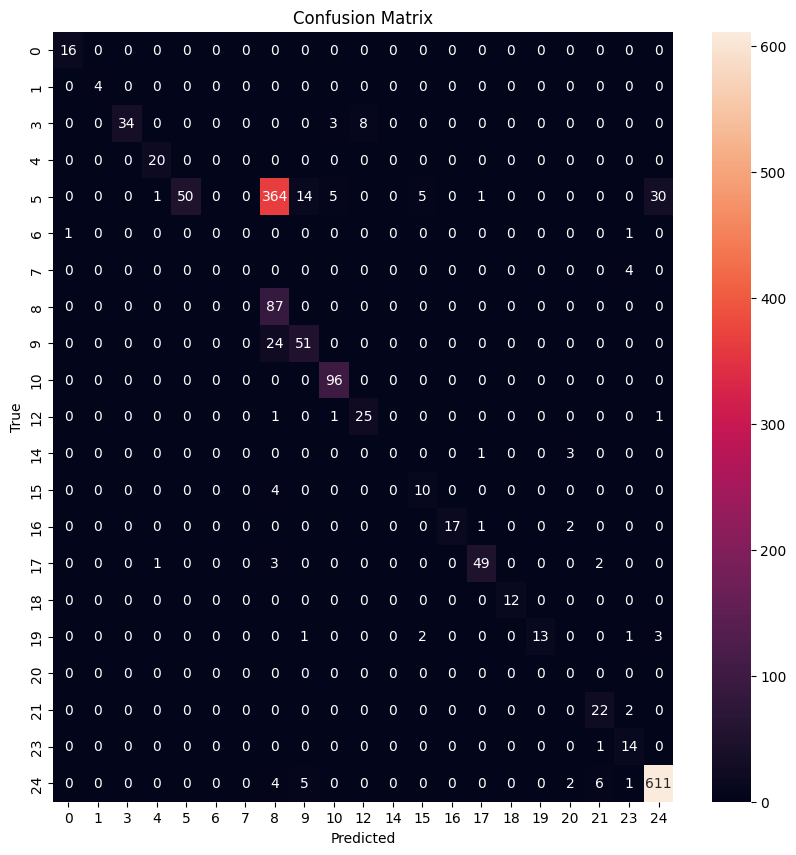

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=all_classes, yticklabels=all_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

From the above confusion matrix, we see that our model is able to predict most instances correctly except for classification 5, which seems to be an outlier.

Let us explore this further.

In [ ]:
data_dictionary()

0       apxs

1       apxs cal target

2       chemcam cal target

3       chemin inlet open

4       drill

5       drill holes

6       drt front

7       drt side

8       ground

9       horizon

10      inlet

11      mahli

12      mahli cal target

13      mastcam

14      mastcam cal target

15      observation tray

16      portion box

17      portion tube

18      portion tube opening

19      rems uv sensor

20      rover rear deck

21      scoop

22      sun

23      turret

24      wheel



Let us define our observed index to match with classification index 5 in our training set.

In [ ]:
obs_index_5  = Y_train[Y_train == int(5)].index

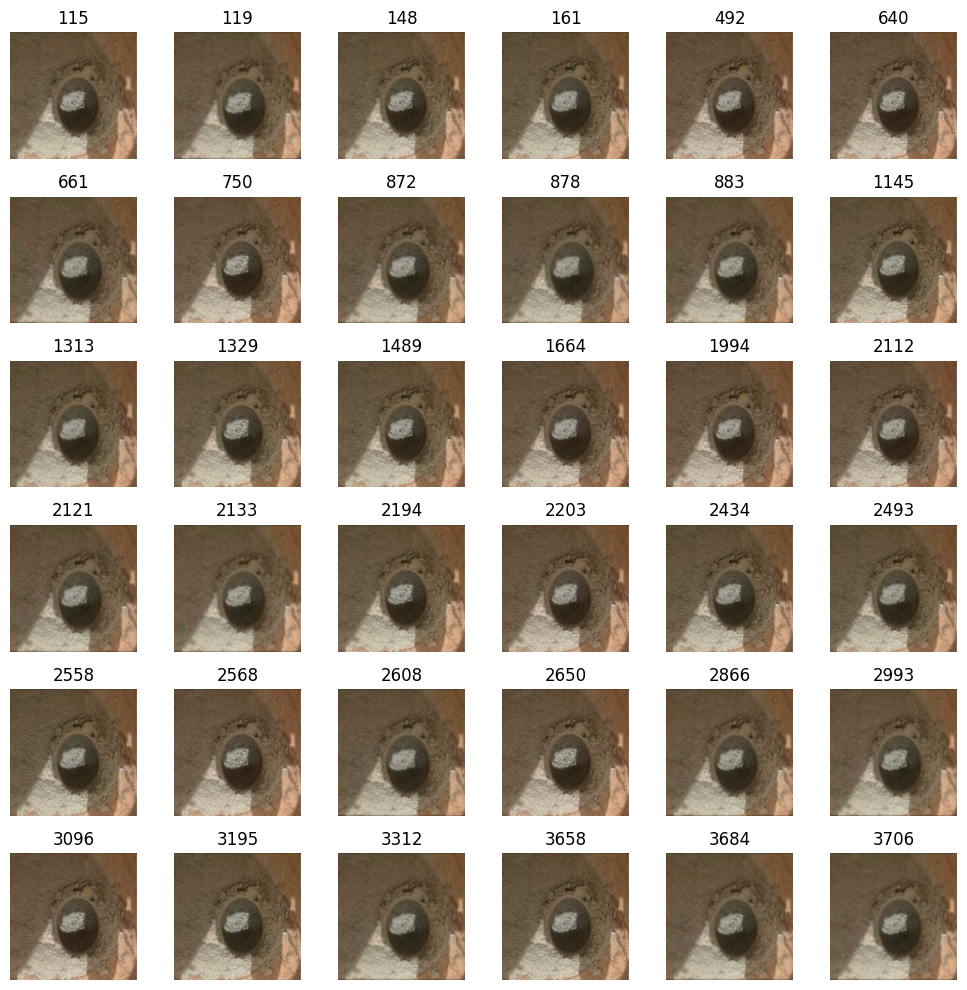

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
axes = axes.ravel()

for i, idx in enumerate(obs_index_5):
    processed_image = process_image(X_train[idx])
    axes[i].imshow(processed_image)
    axes[i].set_title(f"{idx}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


We observe that all the images in "X_train" with index corresponding to "obs_index_5" (drill hole) are exactly the same. Thus, techincally we have only 1 image for Classification 5.

This justifies the poor outcome in Confusion Matrix


# Re-evaluating the model based on our Initial Results

Approach:
* Combine, both the "Training & Validation Set"
* Shuffle and split the dataset into 'Train & Validation'. Preferable split is 80:20
* Ensure that the distribution of the images based on different classes is almost identical in Train & Validation Dataset
* Process images by following similar steps from above
* Train the model
* Evaluate against the New Validation Set
* Report "Accuracy" and "Confusion Matrix"

In [ ]:
cwd

'/content/drive/MyDrive/Colab Notebooks/Mars_Rover'

# Advanced Analysis and Tuning

## Combining Train and Validation Data

In [ ]:
# Read and Append Train Data & Validation Data
data = []

with open('train-calibrated-shuffled.txt') as file:
  data.extend(file.readlines())

with open('val-calibrated-shuffled.txt') as file:
  data.extend(file.readlines())

paths, labels = [], []
for line in data:
  path, label = line.strip().split(' ')
  paths.append(cwd + '/' + path)
  labels.append(int(label))

print(paths)
print(labels)
print(len(paths))

['/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0077ML0005780000102730I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0072MR0005610170103642E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0069MR0004130000103477I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0154ML0008510010104492E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0019MR0000530000100138C00_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0017ML0000500200100233B00_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0025MR0001230130100711E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0044MR0002011110102490E01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0003ML0000000160100036I01_DRCL.JPG', '/content/drive/MyDrive/Colab Notebooks/Mars_Rover/calibrated/0159MR0008640180201373E01_DRCL.JPG', '/content

## Splitting Data with Stratification

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(paths, labels, test_size = 0.2, random_state= 42, stratify = labels)

from collections import Counter
print("Training set labels distribution:", Counter(y_train))
print("Validation set labels distribution:", Counter(y_val))

Training set labels distribution: Counter({8: 1944, 24: 558, 5: 405, 9: 239, 10: 209, 23: 154, 21: 152, 17: 102, 14: 84, 15: 79, 3: 73, 12: 48, 20: 46, 0: 37, 4: 31, 16: 30, 13: 29, 19: 26, 18: 16, 2: 12, 11: 11, 7: 10, 1: 8, 6: 5})
Validation set labels distribution: Counter({8: 486, 24: 140, 5: 101, 9: 60, 10: 52, 23: 39, 21: 38, 17: 26, 14: 21, 15: 20, 3: 19, 12: 12, 20: 11, 0: 9, 4: 8, 16: 8, 13: 7, 19: 6, 18: 4, 11: 3, 2: 3, 7: 2, 1: 2, 6: 1})


In [ ]:
len(X_train), len(X_val)

(4308, 1078)

In [ ]:
unique_values = set(y_train)
len(unique_values)

24

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Combine the training and validation labels
all_labels = np.concatenate([y_train, y_val])

# Fit the encoder on all labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

#Transform on Y_test
Y_test_encoded = label_encoder.transform(Y_test)

# Split them back into training and validation sets
y_train_encoded = all_labels_encoded[:len(y_train)]
y_val_encoded = all_labels_encoded[len(y_train):]

# Check the unique values in the transformed labels
print("Unique values in Y_train_encoded:", np.unique(y_train_encoded))
print("Unique values in Y_val_encoded:", np.unique(y_val_encoded))
print("Unique values in Y_test_encoded:", np.unique(Y_test_encoded))


Unique values in Y_train_encoded: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in Y_val_encoded: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in Y_test_encoded: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23]


In [ ]:
# Assuming BATCH_SIZE is defined
BATCH_SIZE = 32  # You can adjust this based on your specific needs

# Create training and validation data batches
train_data = create_data_batches(X_train, y_train_encoded, batch_size=BATCH_SIZE)
val_data = create_data_batches(X_val, y_val_encoded, valid_data=True, batch_size=BATCH_SIZE)


Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)))

In [ ]:
model = create_model(output_shape=OUTPUT_SHAPE)
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 24)                24048     
                                                                 
Total params: 5456761 (20.82 MB)
Trainable params: 24048 (93.94 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
model_stratify = train_model()

In [ ]:
save_model(model_stratify, suffix="all_images_Adam_stratify_norm_0-1")

## Loading and Evaluating Stratified Model

For learning-rate 0.01

In [ ]:
model_stratify = load_model('model/20231126-22171701037051-all_images_Adam_stratify_norm_0-1.keras')

For learning-rate 0.001

In [ ]:
model_stratify = load_model('model/20231125-21171700947073-all_images_Adam_stratify_norm_0-1.keras')

For learning-rate 0.0001

In [ ]:
model_stratify = load_model('model/20231126-20201701030012-all_images_Adam_stratify_norm_0-1.keras')

Loading saved model from: model/20231126-20201701030012-all_images_Adam_stratify_norm_0-1.keras


In [ ]:
model_stratify.evaluate(val_data)

34/34 [==============================] - 4s 97ms/step - loss: 0.0679 - accuracy: 0.9768


[0.06786171346902847, 0.9768089056015015]

In [ ]:
predictions_stratify = model_stratify.predict(val_data, verbose =1)

34/34 [==============================] - 4s 71ms/step


In [ ]:
# Load the encoder back
with open('label_encoder.pkl', 'rb') as file:
  loaded_label_encoder = pickle.load(file)

predicted_stratify_labels = []
predicted_stratify_confidence = []
# Use loaded_label_encoder to transform labels back
for index in range(len(y_val)):
  label = loaded_label_encoder.inverse_transform([np.argmax(predictions_stratify[index])])
  predicted_stratify_labels.append(label[0])

  confidence = np.max(predictions_stratify[index])
  predicted_stratify_confidence.append(confidence)

print(predicted_stratify_labels[0])
print(predicted_stratify_confidence[0])

8
0.9446607


In [ ]:
get_pred_label(predicted_stratify_labels[0])

8

In [ ]:
true_images = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  true_images.append(image)
  labels_.append(label)


In [ ]:
true_labels = []
# Use loaded_label_encoder to transform labels back
for index in range(len(y_val)):
  label = loaded_label_encoder.inverse_transform([labels_[index]])
  true_labels.append(label[0])

print(true_labels[0])

8


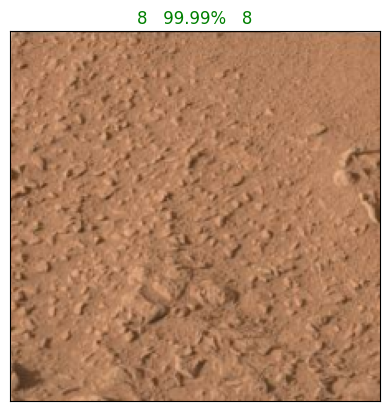

In [ ]:
plot_pred(predicted_stratify_labels, predicted_stratify_confidence, true_labels, true_images, n=11)

In [ ]:
unique_true = set(true_labels)
unique_predicted = set(predicted_stratify_labels)
all_classes = sorted(list(unique_true.union(unique_predicted)))

In [ ]:
all_classes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24]

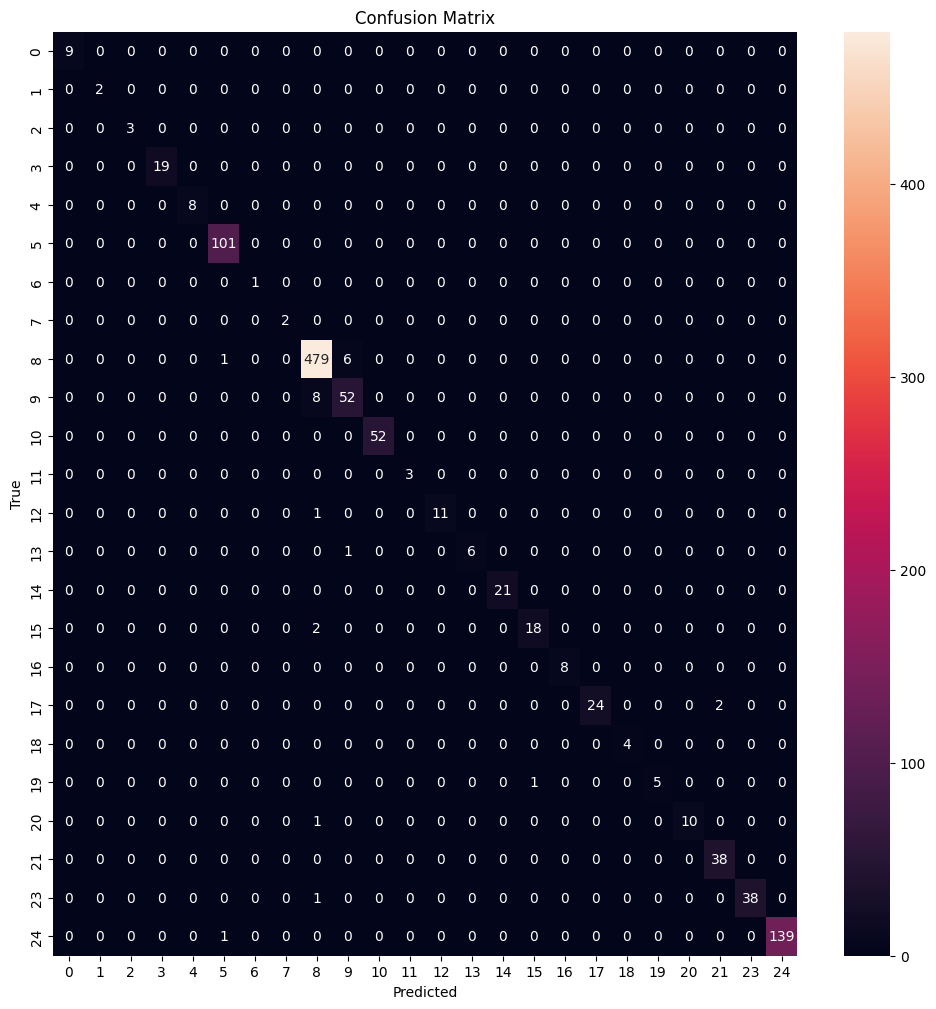

In [ ]:
cm = confusion_matrix(true_labels, predicted_stratify_labels)

# Create a heatmap
plt.figure(figsize=(12, 12))  # You can adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', xticklabels=all_classes, yticklabels=all_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

As you can observe we have compensated for the error we were getting earlier and our confusion matrix looks much more in line with what we expect.

Uptil this point we have again repeated whatever we did earlier but with more balanced dataset so as to get rid of the skewness.

We have reached the final stage of this project, "Predicting values on Test Dataset"

In [ ]:
X_test = X_test.tolist()

In [ ]:
BATCH_SIZE = 32

# Create test data batches
test_data = create_data_batches(X_test, Y_test_encoded, test_data=True, batch_size=BATCH_SIZE)

Creating test data batches...


# Model Performance on Test Data

## Generating Predictions on Test Data

In [ ]:
test_predictions = model_stratify.predict(test_data, verbose =1)

41/41 [==============================] - 4s 75ms/step


In [ ]:
# Load the encoder back
with open('label_encoder.pkl', 'rb') as file:
  loaded_label_encoder = pickle.load(file)

test_labels = []
test_confidence = []
# Use loaded_label_encoder to transform labels back
for index in range(len(Y_test)):
  label = loaded_label_encoder.inverse_transform([np.argmax(test_predictions[index])])
  test_labels.append(label[0])

  confidence = np.max(test_predictions[index])
  test_confidence.append(confidence)

print(test_labels[0])
print(test_confidence[0])

7
0.9609523


In [ ]:
get_pred_label(test_labels[0])

7

In [ ]:
true_images = []

for image in test_data.unbatch().as_numpy_iterator():
  true_images.append(image)

In [ ]:
true_labels = []
# Use loaded_label_encoder to transform labels back
for index in range(len(Y_test_encoded)):
  label = loaded_label_encoder.inverse_transform([Y_test_encoded[index]])
  true_labels.append(label[0])

print(true_labels[0])

7


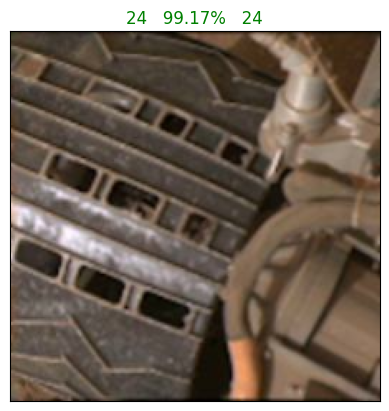

In [ ]:
plot_pred(test_labels, test_confidence, true_labels, true_images, n=11)

Looks like our model is predicting well even on our test set as can be seen from the image above.

## Confusion Matrix and Accuracy Calculation

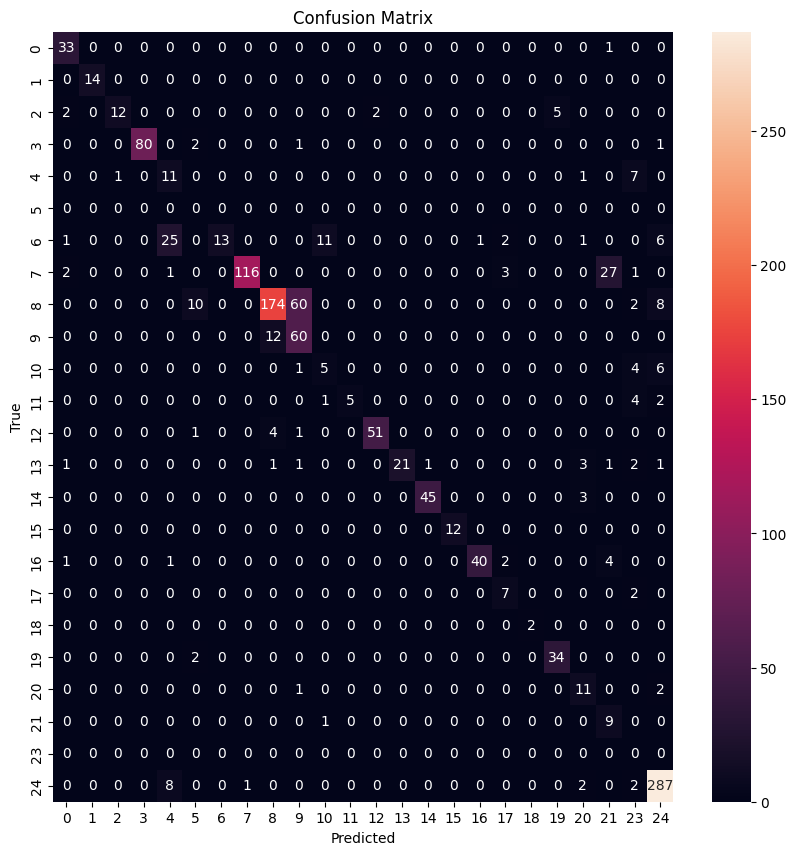

In [ ]:
cm = confusion_matrix(true_labels, test_labels)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=all_classes, yticklabels=all_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = sum(pred == true for pred, true in zip(test_labels, true_labels)) / len(true_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


Barring a few outliers our model seems to be performing great with an accuracy rate of 80%.

In [ ]:
data_dictionary()

0       apxs

1       apxs cal target

2       chemcam cal target

3       chemin inlet open

4       drill

5       drill holes

6       drt front

7       drt side

8       ground

9       horizon

10      inlet

11      mahli

12      mahli cal target

13      mastcam

14      mastcam cal target

15      observation tray

16      portion box

17      portion tube

18      portion tube opening

19      rems uv sensor

20      rover rear deck

21      scoop

22      sun

23      turret

24      wheel



Finally, let us see how our model has performed over a set of 100 images and compare it with our data dictionary.

In [ ]:
import math

def show_100_images(images, predicted_labels, predicted_confidences, true_labels):
    """
    Displays a plot of 100 images, their predicted labels, and their true labels in a grid.
    """
    # Set the number of images to display and calculate the grid size
    num_images = 100
    num_cols = 10
    num_rows = math.ceil(num_images / num_cols)

    # Set up the matplotlib figure and axes
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        ax = plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        # Set the title with predicted and true labels
        pred_label = predicted_labels[i]
        true_label = true_labels[i]
        confidence = predicted_confidences[i]
        title_color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}\nConf: {confidence:.2f}", color=title_color, fontsize=6)

    plt.tight_layout()
    plt.show()

# Now call the function with the first 100 images
# Make sure that true_images, test_labels, test_confidence, and true_labels are correctly populated lists
show_100_images(true_images, test_labels, test_confidence, true_labels)


From the above, we observe that our model has a hard time differentiating between ground(8) and horizon(9). We also see that it is same image that keeps repeating again and again.

So if we wanted to improve the accuracy further, we can give it the same treatment like we did with classification 5 (drill holes) earlier.


But for now 80% accuracy rate is good enough.

# Hyperparameter Tuning

We have already performed this step earlier by varying the learning rates.

The accuracy rate observed by varying the learning rates are as follows:
* learning_rate = 0.01 - 79%
* learning_rate = 0.001 - 76%
* learning_rate = 0.0001 - 80% (demonstrated)

# References

Major parts of this notebook were inspired from the following github guide:
[Github](https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/section-4-unstructured-data-projects)